<a href="https://colab.research.google.com/github/marvelm67/BNCC-DataMining/blob/main/BNCC_Training_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

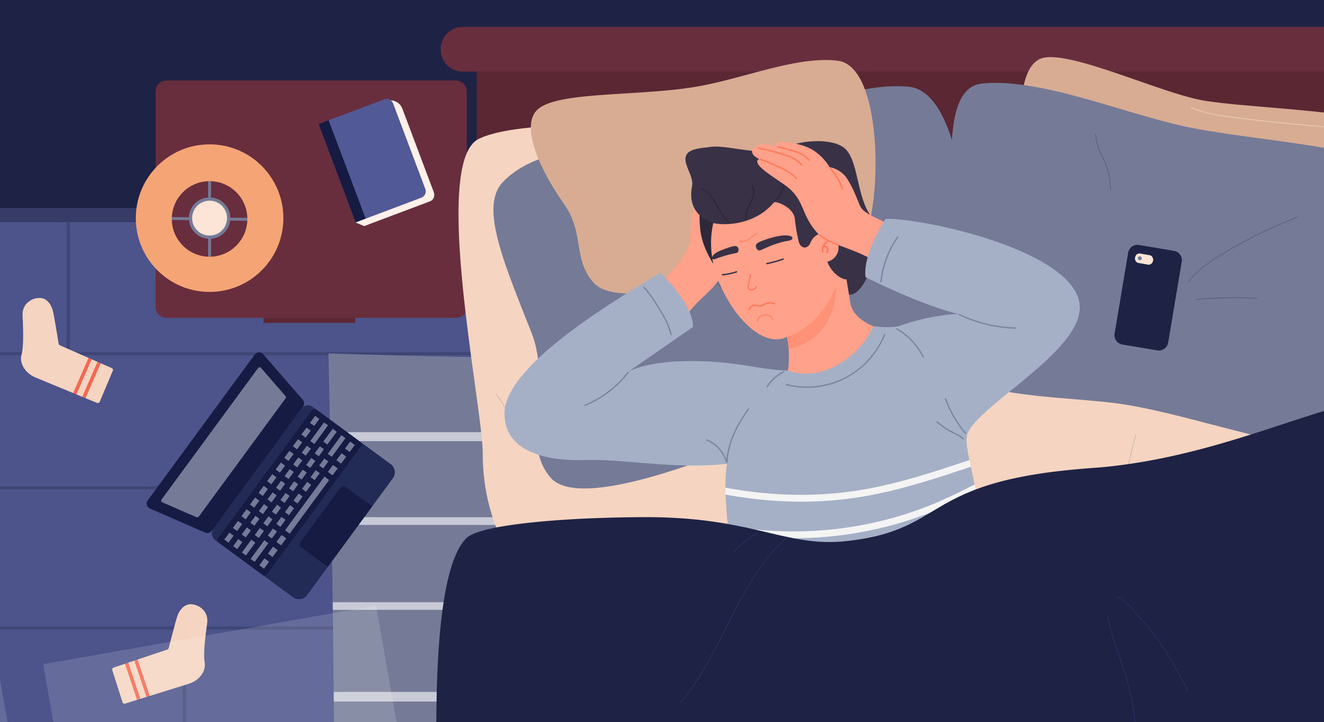
You're working as a consultant for SleepInc, analyzing the anonymized sleep data from their SleepScope app. The dataset (sleep_health_data.csv) contains 374 entries with various lifestyle and health metrics collected over six months. The goal is
* Discover patterns in exercise, gender, occupation, and sleep quality,
* Classify sleep disorders using machine learning.




# **Pre-processing & EDA (session 3)**


---



| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [ ]:
# Download data
!gdown 1JPslVzPIOkhn39iUo2RVtp3KDjaaMblj

Downloading...
From: https://drive.google.com/uc?id=1JPslVzPIOkhn39iUo2RVtp3KDjaaMblj
To: /content/sleep_health_data.csv
100% 23.7k/23.7k [00:00<00:00, 58.2MB/s]


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

# **Exploratory Data Analysis(EDA)**

In [ ]:
# Read Data
df = pd.read_csv("sleep_health_data.csv")

# Check the first few rows of the data
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
## Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# Summary statistics for numerical columns
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**💡 Insight**

- Usia mereka memiliki rentang antara 27 hingga 59 tahun. Paling banyakan itu usia 50 tahun. std 8.67 itu menandakan dataset mencakup kelompok usia beragam.

- Rata-rata durasi tidur adalah 7,13 jam per malam, yang cukup normal, karena rekomendasi tidur orang dewasa adalah antara 7 hingga 9 jam.

- Physical activitynya juga bervariasi dari std sebsar 20,83, sehingga ada beberapa individu yang mungkin sangat aktif, sementara lainnya lebih sedikit bergerak.

- Heart rate std 4,an menunjukkan mereka tuh stabil ya jantungnnya

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

In [ ]:
# checking for total null values
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
# Melihat frekuensi untuk kolom kategorikal
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [ ]:
# Memeriksa unique values untuk setiap kolom
df['Age'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

## **Visualisasi**

1. Distribusi Gender


In [ ]:
import seaborn as sns

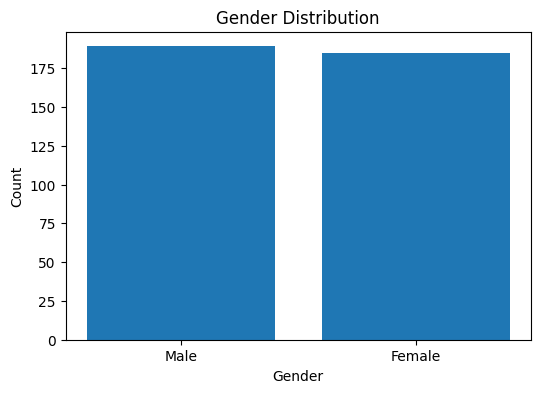

In [ ]:

# Menghitung jumlah gender pada dataset
gender_counts = df['Gender'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## ini pakai seaborn.
# plt.figure(figsize=(6, 4))
# sns.countplot(x='Gender', data=df)
# plt.title('Gender Distribution')
# plt.show()

## **Distribustion Sleep Disorder is NaN**

In [ ]:
# Filter rows where Sleep Disorder is NaN

nan_counts = df['Sleep Disorder'].isna().value_counts()
nan_counts

,count
Sleep Disorder,
True,219
False,155


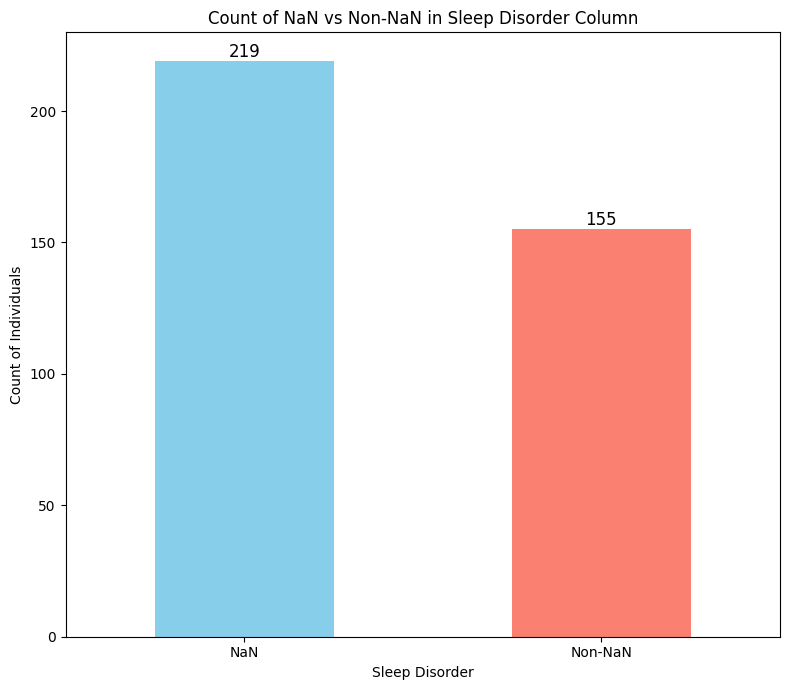

In [ ]:
# Visualize the count of NaN vs non-NaN

plt.figure(figsize=(8, 7))
nan_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of NaN vs Non-NaN in Sleep Disorder Column')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count of Individuals')
plt.xticks(ticks=[0, 1], labels=['NaN', 'Non-NaN'], rotation=0)

# Adding annotations above the bars
for i, v in enumerate(nan_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.tight_layout()
plt.show()

In [ ]:
# Replace all NaN values in the dataset with None
# df = df.where(pd.notna(df), "No Sleep Disorder")
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("No Sleep Disorder")

# df.loc[df["Occupation"] == "Doctor", "Sleep Disorder"] = "Sleepy"

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Distribution Sleep Disroder.
df["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
No Sleep Disorder,219
Sleep Apnea,78
Insomnia,77


## **Occupation has the lowest average sleep duration?**


In [ ]:
# Groupby occupation and calculate mean sleep duration
sleep_duration = df.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending = True)
sleep_duration

,Sleep Duration
Occupation,
Sales Representative,5.900000
Scientist,6.000000
Salesperson,6.403125
Teacher,6.690000
Software Engineer,6.750000
Manager,6.900000
Doctor,6.970423
Nurse,7.063014
Accountant,7.113514


## **Korelasi antara Sleep Disorder dan Variabel Numerik**

In [ ]:
# Label encoding
sleep_disorder_mapping = {'No Sleep Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2}

# Convert Sleep Disorder column to numerical values
df['Sleep Disorder Numeric'] = df['Sleep Disorder'].map(sleep_disorder_mapping)

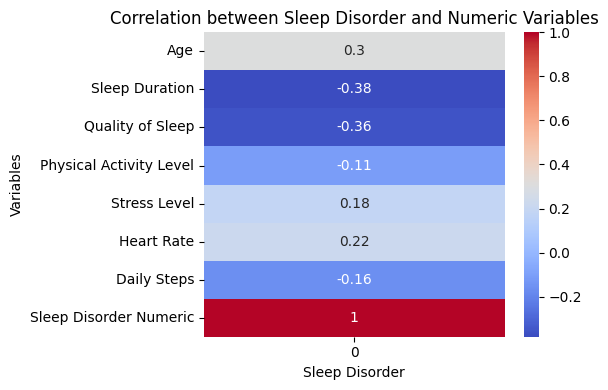

In [ ]:
# Automatically detect numeric columns
numerical_columns = df.select_dtypes(include = ['float64', 'int64']).columns

# Drop the unwanted columns
numerical_columns = numerical_columns.drop('Person ID')

# Compute the correlation of 'Sleep Disorder Numeric' with the other numeric variables
correlations_sleep_disorder = df[numerical_columns].corr()['Sleep Disorder Numeric']

# Reshape the correlation values into a 2D array for the heatmap
correlations_sleep_disorder_reshaped = correlations_sleep_disorder.values.reshape(-1, 1)

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlations_sleep_disorder_reshaped, annot=True, yticklabels=correlations_sleep_disorder.index, cmap='coolwarm')

plt.title('Correlation between Sleep Disorder and Numeric Variables')
plt.ylabel('Variables')
plt.xlabel('Sleep Disorder')
plt.tight_layout()
plt.show()

## **Perbandingan Sleep Disorder berdasarkan Kategori (Gender, BMI Category, Occupation)**

---



<Figure size 1000x600 with 0 Axes>

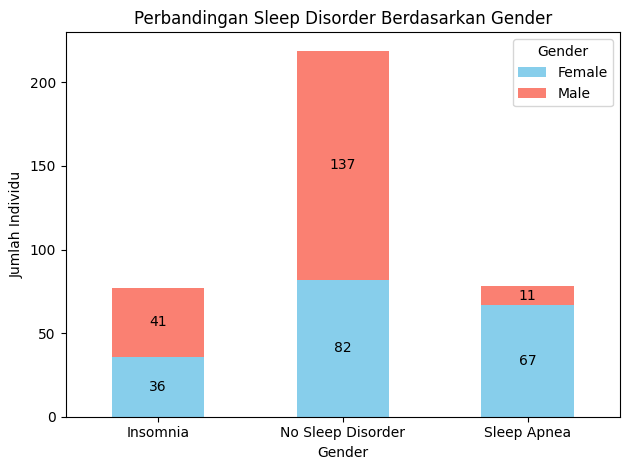

In [ ]:
# Grouping data by Gender
gender_counts = df.groupby(['Sleep Disorder', 'Gender']).size().unstack()

# Plotting Stacked Bar Chart for Gender
plt.figure(figsize=(10, 6))
ax = gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Perbandingan Sleep Disorder Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Individu')

# Adding values (annotations) above each bar segment
for p in ax.patches:
    height = p.get_height()  # Get the height of each patch (bar segment)
    width = p.get_width()    # Get the width (for positioning the text)
    x_position = p.get_x() + width / 2  # Calculate x position of the text
    y_position = p.get_y() + height / 2  # Calculate y position of the text
    ax.text(x_position, y_position, str(int(height)), ha='center', va='center', fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Apakah gangguan tidur lebih umum terjadi pada gender tertentu?

Apakah pekerjaan tertentu (seperti Software Engineer atau Doctor) memiliki tingkat gangguan tidur yang lebih tinggi?

💡 Jumlah yang mengalami gangguan sleep disorder lebih sering terjadi pada perempuan

## **Hubungan antara Stress Level dan Sleep Disorder**

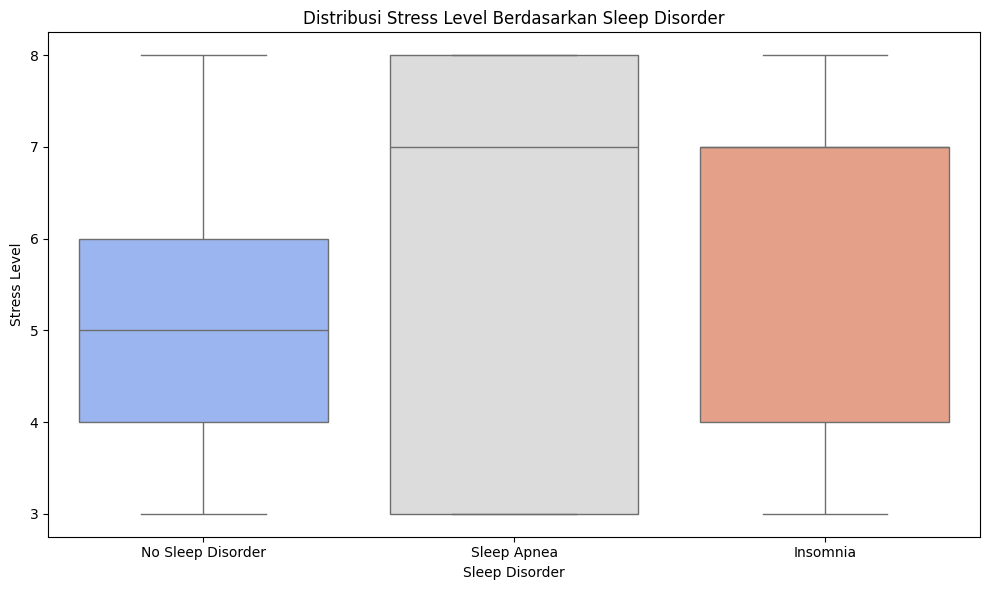

In [ ]:
# Box plot to show distribution of Stress Level for people with and without Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df, hue='Sleep Disorder', palette='coolwarm', legend=False)

plt.title('Distribusi Stress Level Berdasarkan Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')
# plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Apakah ada hubungan stres yang lebih tinggi dengan gangguan tidur?

🟡 Ada kemungkinan bahwa insomnia mempengaruhi stress karena tingkat stress yang mencapai 7.

🟡 Sleep Anea memiliki tingkat stress yang bervariasi..

## **Analisis Usia (Age) terhadap Sleep Disorder**

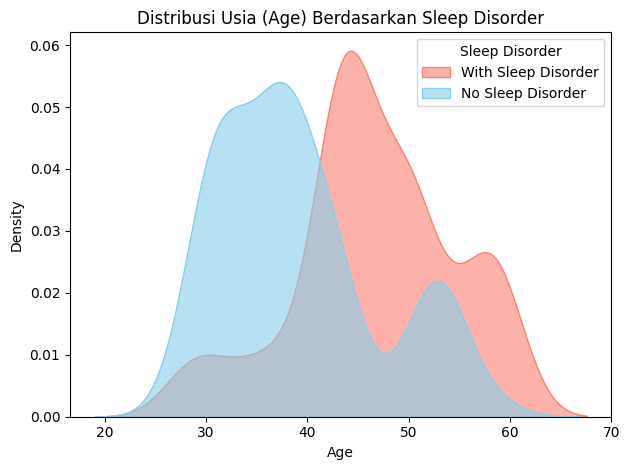

In [ ]:
sns.kdeplot(data=df[df['Sleep Disorder'] != 'No Sleep Disorder'], x='Age', label='With Sleep Disorder', fill=True, color='salmon', alpha=0.6)
sns.kdeplot(data=df[df['Sleep Disorder'] == 'No Sleep Disorder'], x='Age', label='No Sleep Disorder', fill=True, color='skyblue', alpha=0.6)

# Title and labels
plt.title('Distribusi Usia (Age) Berdasarkan Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Density')

# Add legend
plt.legend(title='Sleep Disorder')

# Show the plot
plt.tight_layout()
plt.show()

Apakah usia tertentu lebih rentan terhadap gangguan tidur?

🟡 Orang umur 40 hingga 50 cenderung lbh banyak mengalami sleep disorder..

🟡 Umur 60 seseorang juga lebih rentan megnalami sleep disorder..

## **Physical Activity Level vs Sleep Disorder**

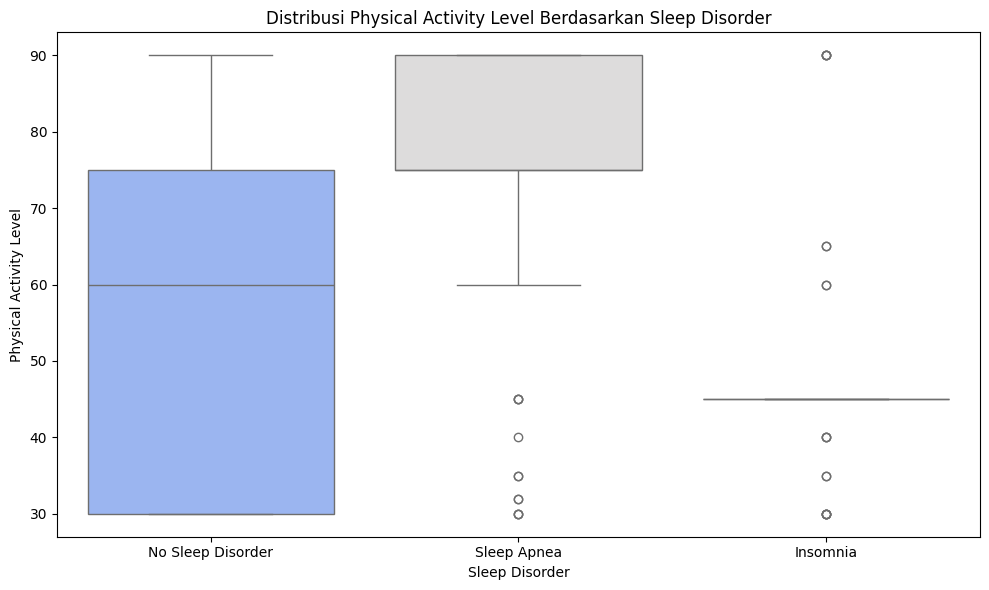

In [ ]:
# Box Plot: Distribusi Physical Activity Level berdasarkan Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df, hue="Sleep Disorder",palette='coolwarm')

# Title and labels
plt.title('Distribusi Physical Activity Level Berdasarkan Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level')
plt.tight_layout()
plt.show()

Apakah orang dengan tingkat aktivitas fisik yang lebih tinggi cenderung memiliki gangguan tidur yang lebih sedikit?

🟡 Untuk sleep apnea menunjukkan bahwa kebanyakan orang yang mengalami itu adalah orang yang melakukan acivity yang lebih tinggi.

🟡 Untuk yang mengalami insomnia itu memlakukan akitivias fisik yang paling kecil.

## **Find occupation with the lowest sleep duration?.**

In [ ]:
sleep_duration = df.groupby('Occupation')['Sleep Duration'].mean()
sleep_duration.sort_values(ascending=False)

,Sleep Duration
Occupation,
Engineer,7.987302
Lawyer,7.410638
Accountant,7.113514
Nurse,7.063014
Doctor,6.970423
Manager,6.900000
Software Engineer,6.750000
Teacher,6.690000
Salesperson,6.403125


## **Find occupation with the lowest sleep quality.**

In [ ]:
# Groupby occupation and calculate average sleep quality
sleep_quality = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
sleep_quality

,Quality of Sleep
Occupation,
Sales Representative,4.000000
Scientist,5.000000
Salesperson,6.000000
Software Engineer,6.500000
Doctor,6.647887
Teacher,6.975000
Manager,7.000000
Nurse,7.369863
Accountant,7.891892


# **Preprocessing**

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder Numeric
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1


# **Convert Data Types**

In [ ]:
# Splitting 'Blood Pressure' into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])
df = df.drop('Blood Pressure', axis=1)  # Drop the original 'Blood Pressure' column

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder Numeric,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,0,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,0,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,0,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,1,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,1,140,90


# **Encode Categorical Variables**

**Label Encoding** (e.g., Male=0, Female=1).

**One-Hot Encoding** (creating binary columns for each category like 'Doctor', 'Engineer', etc.).

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
# le = LabelEncoder()
# df['Gender'] = le.fit_transform(df['Gender'])  # Convert 'Male' and 'Female' to numerical values
# df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])  # Encode Sleep Disorder

# Map 'Male' to 0 and 'Female' to 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Map Sleep Disorder to numeric values
df['Sleep Disorder'] = df['Sleep Disorder'].map({'No Sleep Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

In [ ]:
#One Hot encoding

from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to 'Occupation', 'BMI Category'
encoded_features = encoder.fit_transform(df[['Occupation', 'BMI Category']])

# Convert the result back to a DataFrame and join with original data
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Occupation', 'BMI Category']))

# Concatenate the encoded DataFrame with the original data
df_encoded = pd.concat([df, encoded_df], axis=1).drop(['Occupation', 'BMI Category'], axis=1)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,0,27,6.1,6,42,6,77,4200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0,28,6.2,6,60,8,75,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,28,6.2,6,60,8,75,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,28,5.9,4,30,8,85,3000,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,28,5.9,4,30,8,85,3000,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Scaling**

In [ ]:
# Scale Features for ML Algo like KNN Or SVM

from sklearn.preprocessing import StandardScaler

# Columns to normalize
columns_to_normalize = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

# Create the scaler object
scaler = StandardScaler()

# Make a copy variable
df_scaled_features = df_encoded

# # Apply the scaler to the selected columns
df_scaled_features[columns_to_normalize] = scaler.fit_transform(df_scaled_features[columns_to_normalize])

In [ ]:
df_scaled_features.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,0,-1.753096,-1.298887,6,-0.825418,0.347021,1.654719,-1.619584,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0,-1.637643,-1.173036,6,0.039844,1.475592,1.170474,1.970077,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,-1.637643,-1.173036,6,0.039844,1.475592,1.170474,1.970077,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,-1.637643,-1.550588,4,-1.402260,1.475592,3.591698,-2.362273,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,-1.637643,-1.550588,4,-1.402260,1.475592,3.591698,-2.362273,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_scaled_features.columns

Index(['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Sleep Disorder Numeric', 'Systolic', 'Diastolic',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

# **NEW : REMOVE DUPE COLUMN**

Terdapat duplicate columns yaitu `'Sleep Disorder', 'Sleep Disorder Numeric'`.

Disini kita bakal "drop" column `Sleep Disorder Numeric` biar gak ada duplikat lagi.

In [ ]:
print(df_scaled_features[['Sleep Disorder', 'Sleep Disorder Numeric']])

     Sleep Disorder  Sleep Disorder Numeric
0                 0                       0
1                 0                       0
2                 0                       0
3                 1                       1
4                 1                       1
..              ...                     ...
369               1                       1
370               1                       1
371               1                       1
372               1                       1
373               1                       1

[374 rows x 2 columns]


In [ ]:
df_scaled_features = df_scaled_features.drop('Sleep Disorder Numeric', axis=1)

In [ ]:
df_scaled_features.columns

Index(['Person ID', 'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

Sudah tidak ada duplikat :D

# **Splitting**

In [ ]:
# Split Dataset (train, test, validation)

from sklearn.model_selection import train_test_split
X = df_scaled_features.drop('Sleep Disorder', axis=1)  # Features
y = df_scaled_features['Sleep Disorder']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **NEW (INFO) : Oversampling**

In [ ]:
# Oversampling training ds

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

**Before and After SMOTE**

Sebagai Info Refresh:
`({'No Sleep Disorder': 0, 'Sleep Apnea': 1, 'Insomnia': 2})`

In [ ]:
from collections import Counter

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 175, 1: 62, 2: 62})
After SMOTE: Counter({1: 175, 2: 175, 0: 175})


<ipython-input-39-e9a004d9f90e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=before_counts, ax=axes[0], palette="Blues")
<ipython-input-39-e9a004d9f90e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=after_counts, ax=axes[1], palette="Oranges")


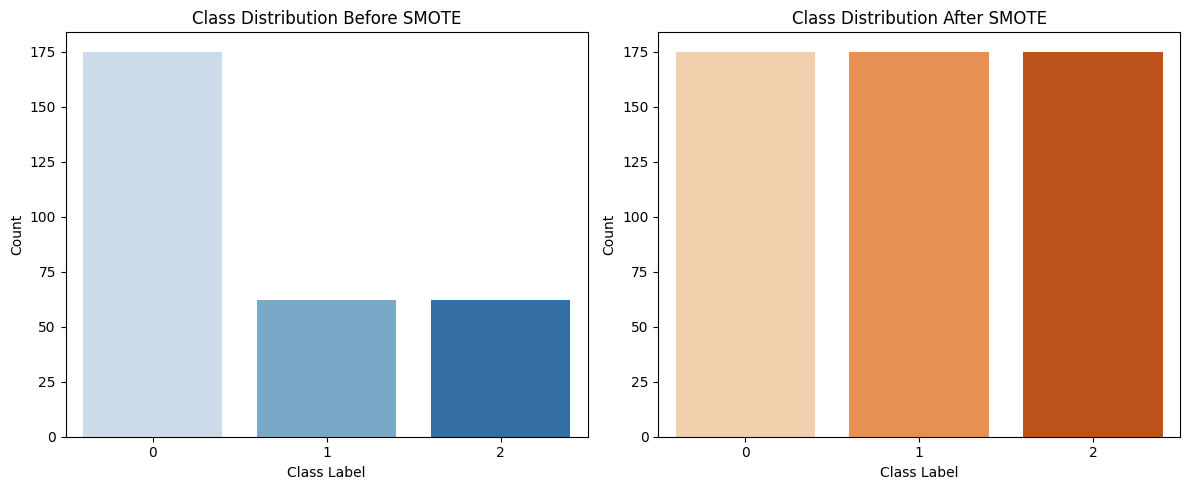

In [ ]:
# Class distribution
before_smote = Counter(y_train)
after_smote = Counter(y_train_res)

# Convert to lists for plotting
labels = list(before_smote.keys())
before_counts = list(before_smote.values())
after_counts = list(after_smote.values())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x=labels, y=before_counts, ax=axes[0], palette="Blues")
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class Label")
axes[0].set_ylabel("Count")

# After SMOTE
sns.barplot(x=labels, y=after_counts, ax=axes[1], palette="Oranges")
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class Label")
axes[1].set_ylabel("Count")

# Show plot
plt.tight_layout()
plt.show()



---


# **Session 5  - Deep Learning**

## Import Library

In [ ]:
# Buat Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Prepare Dataset

Kita perlu 'encoding' lagi

One-hot encoding,

awalnya kita punya dataset

[0, 1, 2, 0, 2, ...]

Kita mau ubah jadi

[0, 1, 0],
[1, 0, 0]

In [ ]:
y_train_res
# Ini kita mau ubah ke categorical

,Sleep Disorder
0,1
1,2
2,0
3,0
4,1
...,...
520,2
521,2
522,2
523,2


In [ ]:
# Originally y-test seperti ini
y_test

# [0, 1, 2]

,Sleep Disorder
68,0
58,0
196,2
191,2
60,0
...,...
21,0
174,0
362,1
104,1


In [ ]:
y_train_res_cat = to_categorical(y_train_res, num_classes = 3)
# y train - resampled - categorical

# Kita juga harus ubah y_test nya

y_test_cat = to_categorical (y_test, num_classes = 3)

In [ ]:
y_train_res_cat

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

# Defining the Model

- 1 Input layer
- 2 Hidden Layer
- 1 Output Layer

Ada beberapa hal utama:
- Dense layer --> layer NN (neural network), untuk belajar pola
- Dense layer dibikin dari neuron yang 'banyak' ke 'dikit'
- Ada activation function, disini aku bakal pakai `relu` --> Terus gabung pakai `softmax` di akhir.
- Dropout layer --> teknik biar model gak 'menghafal', dengan cara secara random meng-nonaktifkan sejumlah neuron.



In [ ]:
# Fitur X --> kita simpen di variable X_train_res
X_train_res.shape

(525, 23)

In [ ]:
X_train_res.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,271,1,0.786871,-1.298887,6,1.481948,1.475592,1.170474,1.970077,1.479309,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,201,0,0.094153,-0.795484,6,-0.681208,0.911306,0.444107,-0.505551,0.186944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,143,1,-0.483112,-0.040380,8,0.039844,-0.781551,-0.524383,0.113356,-1.751604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,330,1,1.248683,1.721530,9,-1.402260,-1.345836,-1.250750,-1.124458,-0.459239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,356,1,1.825948,1.092276,9,0.760896,-1.345836,-0.524383,0.113356,1.479309,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
model = Sequential([
    # Isi kalian mau layer model-nya kayak apa.
    Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)), # Input layer
    Dropout(0.3),
    Dense(64, activation='relu'), # Hidden layer 1
    Dropout(0.3),
    Dense(32, activation='relu'), # Hidden layer 2
    Dropout(0.3),
    Dense(3, activation='softmax') # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(X_train_res, y_train_res_cat,
                    epochs=300, batch_size=32)

Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3674 - loss: 1.1004
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3732 - loss: 1.1278 
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4346 - loss: 1.0913 
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3926 - loss: 1.0612 
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4282 - loss: 1.1020 
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4219 - loss: 1.0292 
Epoch 7/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4013 - loss: 1.0424 
Epoch 8/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4548 - loss: 0.9794 
Epoch 9/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.9540 
Epoch 10/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4907 - loss: 0.9680 
Epoch 11/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4700 - loss: 0.9554 
Epoch 12/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

## Evaluate Model

In [ ]:
# Kita minta model buat predict 'X_test', untuk check probability setiap class
y_pred_prob = model.predict(X_test)

print(y_pred_prob)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[1.60754134e-05 9.99927342e-01 5.64760667e-05]
 [9.48639750e-01 2.60168454e-03 4.87584732e-02]
 [1.53196976e-02 1.49300963e-01 8.35379303e-01]
 [1.53952017e-02 1.10982284e-01 8.73622417e-01]
 [9.45434451e-01 2.52143713e-03 5.20440415e-02]
 [9.21331823e-01 1.56008918e-03 7.71080554e-02]
 [7.33771501e-03 9.67951417e-01 2.47108396e-02]
 [8.07960033e-01 1.21427756e-02 1.79897115e-01]
 [1.82326809e-02 9.16613564e-02 8.90105963e-01]
 [9.45034623e-01 9.86133309e-05 5.48668057e-02]
 [9.05171990e-01 3.20347468e-03 9.16245878e-02]
 [9.99999940e-01 2.20731354e-12 4.83933393e-10]
 [2.07970086e-02 9.78469372e-01 7.33546563e-04]
 [9.21449602e-01 1.04928052e-03 7.75011107e-02]
 [9.99783993e-01 1.38508200e-04 7.75303270e-05]
 [9.23222363e-01 3.16426121e-02 4.51350585e-02]
 [8.37424099e-01 9.74526163e-03 1.52830690e-01]
 [9.45602000e-01 1.00454723e-04 5.42975329e-02]
 [2.15919204e-02 9.77264047e-01 1.14404748e-03]
 [9.28046405e-01 1.20085862e-03 7.07527027e-02]
 [

In [ ]:
# Hanya mau mengambil nilai tertinggi dari hasil prediksi- 3 kelas.
y_pred = np.argmax(y_pred_prob, axis = 1)
# hasil prediksi akhir

## Evaluation Metrics

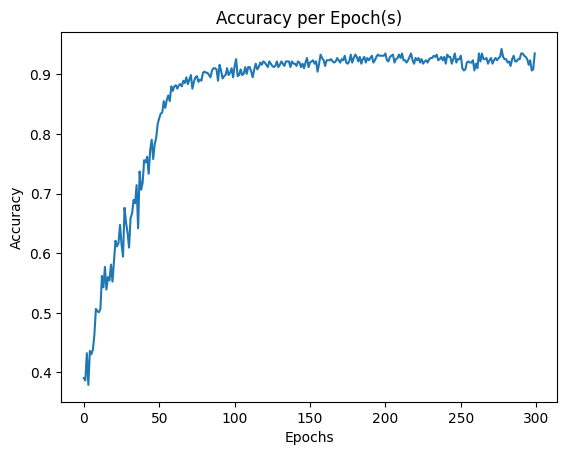

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch(s)")
plt.show()

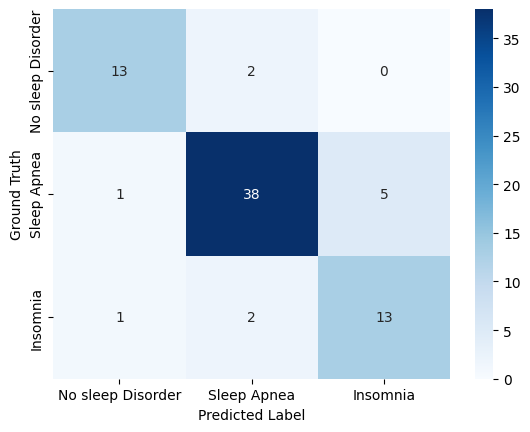

In [ ]:
# Reverse mapping
label_map = {0:'No sleep Disorder', 1: 'Sleep Apnea', 2: 'Insomnia'}

# Convert
y_test_mapped = pd.Series(y_test).map(label_map)
y_pred_mapped = pd.Series(y_pred).map(label_map)

# bikin CM
cm = confusion_matrix(y_test_mapped, y_pred_mapped)

# Plot
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("Ground Truth")
plt.show()

In [ ]:
# Bikin classification report
print(classification_report(y_test_mapped, y_pred_mapped))

                   precision    recall  f1-score   support

         Insomnia       0.87      0.87      0.87        15
No sleep Disorder       0.90      0.86      0.88        44
      Sleep Apnea       0.72      0.81      0.76        16

         accuracy                           0.85        75
        macro avg       0.83      0.85      0.84        75
     weighted avg       0.86      0.85      0.85        75



Kesimpulannya, deep learning hasilnya lebih 'rendah' dibandingkan model ML, karena datasetnya terlalu kecil.